In [136]:
import pandas as pd
raw_df = pd.read_csv('weatherAUS.csv')
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)
raw_df



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [137]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [138]:
fig =px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')
fig.update_layout(width=800,height=600)
fig.show()

In [139]:
px.scatter(raw_df.sample(2000),x='MinTemp',y='MaxTemp',color='RainToday',width=800,height=600)
# raw_df[['MinTemp','MaxTemp','RainToday']].corr()


In [140]:
# sns.violinplot(x='Humidity9am',y='Humidity3pm',hue='RainToday',data=raw_df,palette='Set1')  #utterflop bwaha
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a contingency table
# contingency_table = pd.crosstab(raw_df['RainToday'], raw_df['RainTomorrow'])

# # Plot a heatmap
# sns.heatmap(contingency_table, annot=True, cmap='Blues')
# plt.xlabel('Rain Tomorrow')
# plt.ylabel('Rain Today')
# plt.title('Rain Today vs Rain Tomorrow')
# plt.show()
#heatmap not nice go for barplot but that would bbe bad too cause its for discrete variables so we are opting for histograms as we plotting continuos data
px.histogram(raw_df,x='RainTomorrow',color='RainToday',width=800,height=600)
px.histogram(raw_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')
px.scatter(raw_df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow',width=800,height=600)

In [141]:
from sklearn.model_selection import train_test_split
train2_df,test_df=train_test_split(raw_df,test_size=0.2,random_state=42)  #20% in test and remaining in train2_df
train_df,val_df=train_test_split(train2_df,test_size=0.25,random_state=42) # 25% going into the valuation df and 75% to the training set
train_df.shape
# val_df.shape

(84471, 23)

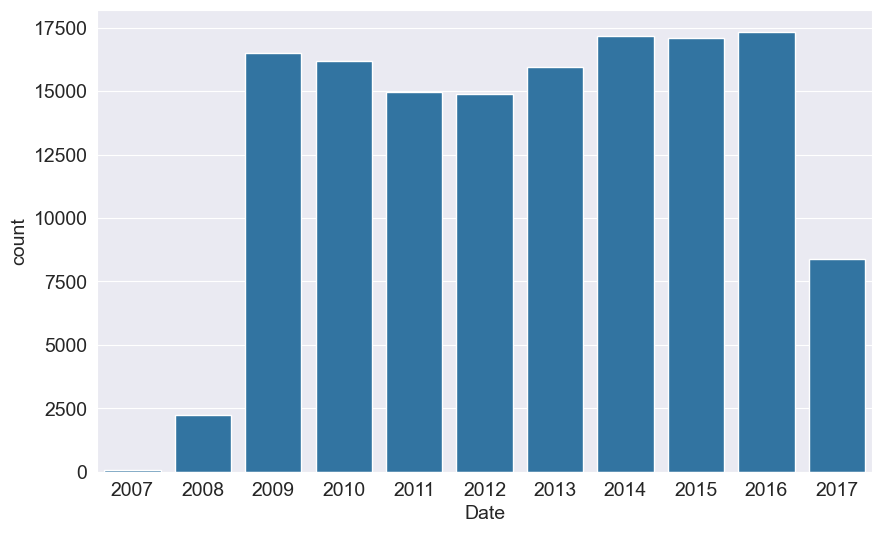

In [142]:
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [143]:
input_col=list(train_df.columns)[1:-1]
target_col='RainTomorrow'

In [205]:
#now we need to get a dataframe for inputs and targets of valuation set and test set and copy them so that the original csv is not disturbed
val_inp =val_df[input_col].copy()
val_target=val_df[target_col].copy()
train_inp=train_df[input_col].copy()
train_target=train_df[target_col].copy()
test_inputs = test_df[input_col].copy()
test_targets = test_df[target_col].copy()
val_target.isna().count()

17089

In [145]:
import numpy as np
num_col=train_inp.select_dtypes(include=np.number).columns.tolist()
cat_col=train_inp.select_dtypes(include=object).columns.tolist()
# train_inp[num_col].describe()
cat_col

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [146]:
#replacing NaN values with mean using imputer
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='mean')
imputer.fit(raw_df[num_col])   # fits i.e finds the mean of the columns mentioned
train_inp[num_col]=imputer.transform(train_inp[num_col])  #imputer.transform gives numpy array and fills the NaN with mean ,and we are joing it in the data fram as a new column
train_inp[num_col].isna().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(raw_df[num_col])
train_inp[num_col]=scaler.transform(train_inp[num_col])
val_inp[num_col]= scaler.transform(val_inp[num_col])
test_inputs[num_col]=scaler.transform(test_inputs[num_col])
train_inp[num_col]



,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.718336,0.000000,0.037741,0.526244,0.286822,0.184615,0.298851,0.22,0.13,0.555372,0.5232,0.492351,0.499917,0.651899,0.714012
144549,0.556604,0.786389,0.000000,0.037741,0.526244,0.193798,0.146154,0.229885,0.16,0.08,0.530579,0.4880,0.492351,0.499917,0.761603,0.771593
144550,0.608491,0.805293,0.000000,0.037741,0.526244,0.255814,0.200000,0.103448,0.15,0.08,0.519008,0.4944,0.492351,0.499917,0.778481,0.788868
144551,0.674528,0.818526,0.000000,0.037741,0.526244,0.286822,0.215385,0.195402,0.22,0.09,0.553719,0.5136,0.492351,0.499917,0.780591,0.817658


In [177]:
# raw_df[cat_col].nunique()

from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(handle_unknown='ignore',sparse_output=False)
raw_df2=raw_df[cat_col].fillna('Unknown')
encoder.fit(raw_df2)
encoder.categories_
encoded_cols =list(encoder.get_feature_names_out(cat_col))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [178]:
# Before assigning transformed features
print("Train Input Shape (Categorical Columns):", train_inp[cat_col].shape)
print("Validation Input Shape (Categorical Columns):", val_inp[cat_col].shape)
print("Test Input Shape (Categorical Columns):", test_inputs[cat_col].shape)

print("Train Encoded Shape:", encoder.transform(train_inp[cat_col]).shape)
print("Validation Encoded Shape:", encoder.transform(val_inp[cat_col]).shape)
print("Test Encoded Shape:", encoder.transform(test_inputs[cat_col]).shape)

print("Encoded Columns:", encoded_cols)

# Assign transformed features
train_inp[encoded_cols] = encoder.transform(train_inp[cat_col])
val_inp[encoded_cols] = encoder.transform(val_inp[cat_col])
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_col])

# After assigning transformed features
print("Train Input Shape (After Encoding):", train_inp.shape)
print("Validation Input Shape (After Encoding):", val_inp.shape)
print("Test Input Shape (After Encoding):", test_inputs.shape)


Train Input Shape (Categorical Columns): (97988, 5)
Validation Input Shape (Categorical Columns): (17089, 5)
Test Input Shape (Categorical Columns): (25710, 5)
Train Encoded Shape: (97988, 102)
Validation Encoded Shape: (17089, 102)
Test Encoded Shape: (25710, 102)
Encoded Columns: ['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'L

C:\Users\ChinmayeeAdmin\AppData\Local\Temp\ipykernel_31276\469675246.py:13: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ChinmayeeAdmin\AppData\Local\Temp\ipykernel_31276\469675246.py:13: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ChinmayeeAdmin\AppData\Local\Temp\ipykernel_31276\469675246.py:13: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

In [180]:
train_inp[encoded_cols] = encoder.transform(train_inp[cat_col])
val_inp[encoded_cols] = encoder.transform(val_inp[cat_col])
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_col])
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unknown,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unknown,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,NaN,NaN,ENE,0.372093,NaN,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,Albury,0.693396,0.725898,0.001078,NaN,NaN,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,Albury,0.634434,0.527410,0.005930,NaN,NaN,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,NaN,NaN,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0

In [184]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='liblinear')
model.fit(train_inp[num_col+encoded_cols],train_target)


LogisticRegression(solver='liblinear')

In [183]:
model.coef_.tolist()

[[0.8944645911260298,
  -2.883748113711564,
  3.1670803158966936,
  0.8754927594872135,
  -1.6711916116523482,
  6.767483656484643,
  -0.9347351350390717,
  -1.430821022815535,
  0.32168800228935457,
  5.998219888261524,
  5.479703951241409,
  -9.193284219052066,
  -0.16164051848418395,
  1.2877808407898768,
  0.47439836727210427,
  2.0304045312039403,
  0.6006210358921192,
  -0.5482729275450313,
  0.47585100096907446,
  0.00550103703192292,
  0.3448191498016688,
  -0.3541807523332053,
  0.17795282646867489,
  0.439731351154351,
  -0.015397889875892112,
  0.027546312507894022,
  0.2568638723308708,
  -0.021912735486392866,
  -0.04482348517250697,
  -0.4845747607992497,
  -0.13897475916046376,
  -0.5769818876477767,
  -0.788819418341101,
  -0.25771970984562026,
  -0.3301485612261468,
  -0.5704164186629307,
  0.08005905240983147,
  0.010464104703067561,
  0.06308003517570976,
  -0.9041758219508169,
  -0.4426299194628326,
  0.003805958810057315,
  -0.46231612723099136,
  -0.46668032947650

In [187]:
Y_train= train_inp[num_col+encoded_cols]
Y_val=val_inp[num_col+encoded_cols]
Y_test=test_inputs[num_col+encoded_cols]
Y_pred =model.predict(Y_train)
Y_pred
Y_prob=model.predict_proba(Y_train)
Y_prob

array([[0.94410222, 0.05589778],
       [0.94077465, 0.05922535],
       [0.96099514, 0.03900486],
       ...,
       [0.98747292, 0.01252708],
       [0.98331582, 0.01668418],
       [0.87427966, 0.12572034]])

In [188]:
from sklearn.metrics import accuracy_score
accuracy_score(train_target,Y_pred)

0.8519716700004082

In [193]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target,Y_pred,normalize ='true')

array([[0.94622654, 0.05377346],
       [0.477475  , 0.522525  ]])

In [200]:
def model_plot(inputs,target,name =''):
    predictions=model.predict(inputs)
    accuracy=accuracy_score(target,predictions)
    print("model has a {:.2f}% ".format(accuracy*100))
    cf =confusion_matrix(target,predictions,normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True)
  
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    # plt.title('{} Confusion Matrix'.format(name));
    return predictions

model has a 85.20% 


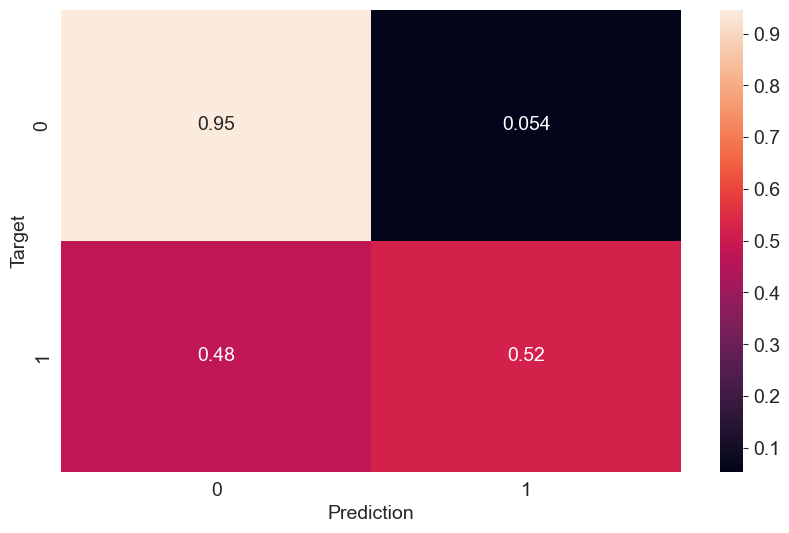

In [201]:
train_preds = model_plot(Y_train, train_target, 'Training')

In [207]:

# X_val_imputed = Y_val.fillna(Y_val.mean())
# val_preds=model_plot(Y_val,val_target,'Valuation')